# Chap2.简单线性回归

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import statsmodels.formula.api as smf

### 1.线性回归
### 可用sm.OLS(Y,X)或者 smf.ols(formula,data)

In [2]:
data = pd.read_csv("/Users/luofeifei/study/DataAnalysis/All_Data/P031.txt",sep="\t")

In [3]:
data.head()

,Minutes,Units
0,23,1
1,29,2
2,49,3
3,64,4
4,74,4


In [4]:
X = data["Units"].values.reshape(-1,1)
Y = data["Minutes"].values.reshape(-1,1)
XC = sm.add_constant(X)
model = sm.OLS(Y,XC)

In [5]:
result = model.fit()
result.params

array([ 4.16165414, 15.50877193])

### 2.参数检验

In [6]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           8.92e-13
Time:                        11:37:29   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.2

/Users/luofeifei/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [7]:
Y_pred = result.predict(XC)

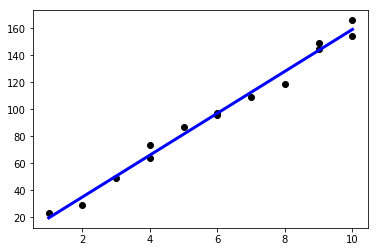

In [8]:
plt.scatter(X,Y,color = "black")
plt.plot(X,Y_pred,color='blue', linewidth=3)
plt.show()

In [9]:
y0 = result.predict([1,4])
y0

array([66.19674185])

In [10]:
sigma = np.sqrt(sum(result.resid**2)/(X.shape[0]-2))
sigma

5.391724916691922

### 3.平凡模型

In [17]:
model2 = smf.ols(formula="Minutes ~ Units -1",data=data)

In [18]:
dresult = model2.fit()

In [19]:
print(dresult.summary())

                                 OLS Regression Results                                
Dep. Variable:                Minutes   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              5274.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):                    2.38e-18
Time:                        11:38:50   Log-Likelihood:                         -43.219
No. Observations:                  14   AIC:                                      88.44
Df Residuals:                      13   BIC:                                      89.08
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/luofeifei/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [20]:
sigma2 = sum(dresult.resid**2)

In [22]:
sigma**2,sigma2

(29.070697577276515, 393.57605177993537)